In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the CSV file from the given URL
url = "https://github.com/tech4alltraining/aiml/raw/refs/heads/main/datasets/classification/adult.csv"
data = pd.read_csv(url)

data


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Show the number of rows and columns
print("Shape of dataset:", data.shape)

# Show data types of each column
print("\nData Types:\n", data.dtypes)

# Get a statistical summary
print("\nSummary Statistics:\n", data.describe(include='all'))


Shape of dataset: (32561, 15)

Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Summary Statistics:
                  age workclass        fnlwgt education  education.num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.

In [ ]:
# Get column names for numerical and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include='object').columns

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)



Numeric columns: Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
Categorical columns: Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [ ]:
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())



Unique values in 'workclass':
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique values in 'education':
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Unique values in 'marital.status':
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in 'occupation':
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values in 'relationship':
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Unique values in 'race':
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Unique values in '

In [ ]:
data.replace("?", np.nan, inplace=True)



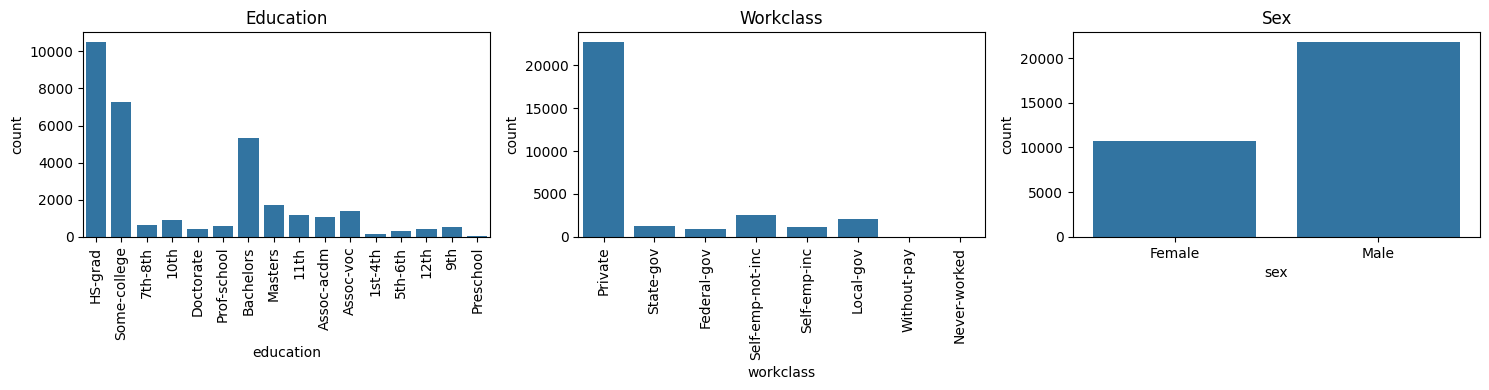

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='education', data=data)
plt.xticks(rotation=90)
plt.title('Education')

plt.subplot(1, 3, 2)
sns.countplot(x='workclass', data=data)
plt.xticks(rotation=90)
plt.title('Workclass')

plt.subplot(1, 3, 3)
sns.countplot(x='sex', data=data)
plt.title('Sex')

plt.tight_layout()
plt.show()


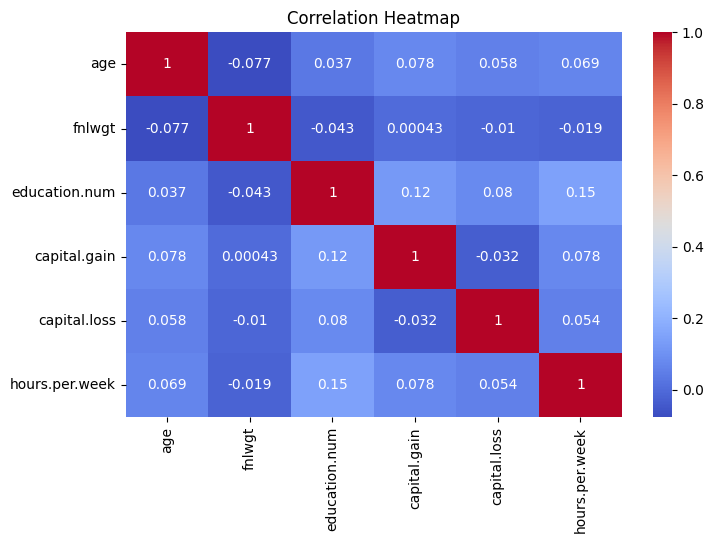

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


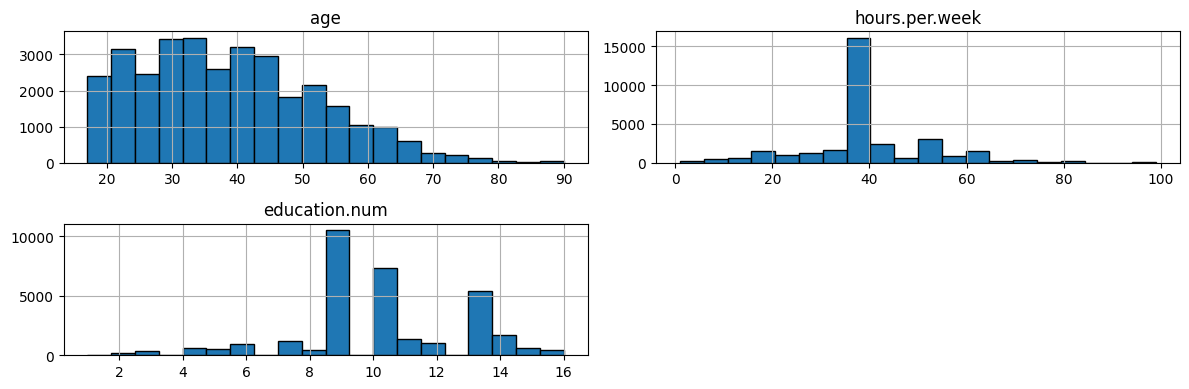

In [ ]:
# Drop NaNs just for plotting
plot_data = data[['age', 'hours.per.week', 'education.num']].dropna()

# Plot histograms
plot_data.hist(figsize=(12, 4), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# Check how many missing values
print("\nMissing values:\n", data.isnull().sum())



Missing values:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [ ]:
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-11-316005981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 24


In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
# Check how many missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
#Feature Engineering
#age
for i in data:
    data.loc[(data['age'] > 16) & (data['age'] <= 25), 'age'] = 1
    data.loc[(data['age'] > 25) & (data['age'] <= 32), 'age'] = 2
    data.loc[(data['age'] > 32) & (data['age'] <= 40), 'age'] = 3
    data.loc[(data['age'] > 40) & (data['age'] <= 50), 'age'] = 4
    data.loc[data['age'] > 50, 'age'] = 5
data['age']

,age
0,5
1,5
2,5
3,5
4,4
...,...
32556,1
32557,2
32558,3
32559,5


In [ ]:
# Get the count of each age category
age_counts = data['age'].value_counts().sort_index()

print("Count of different categories in age:")
print(age_counts)

Count of different categories in age:
age
1    6400
2    5874
3    6827
4    6977
5    6459
Name: count, dtype: int64


In [ ]:
# education
data['education'] = data['education'].apply(lambda x: 'School' if x == '11th' or x == '7th-8th' or x == '10th'
                                              or x == '5th-6th' or x == '9th' or x == '12th' or x == '1st-4th'
                                              or x == 'Preschool' else x)
data['education'] = data['education'].apply(lambda x: 'Associate' if x == 'Assoc-acdm' or x == 'Assoc-voc' else x)
education_map = {'School':1,
             'HS-grad':2,
             'Some-college':3,
             'Bachelors':4,
             'Prof-school':5,
             'Associate':6,
             'Masters':7,
             'Doctorate':8}
data['education'] = data['education'].map(education_map)
data['education']

,education
0,2
1,2
2,3
3,1
4,3
...,...
32556,3
32557,6
32558,2
32559,2


In [ ]:
# Get the count of each education category
education_counts = data['education'].value_counts().sort_index()

print("Count of different categories in education:")
print(education_counts)

Count of different categories in education:
education
1     4248
2    10494
3     7282
4     5353
5      576
6     2449
7     1722
8      413
Name: count, dtype: int64


In [ ]:
# marital status
data['marital.status'] = data['marital.status'].apply(lambda x: 'Prev-Married' if (x == 'Widowed' or x == 'Divorced' or x == 'Separated') else x)
data['marital.status'] = data['marital.status'].apply(lambda x: 'Married' if (x == 'Married-civ-spouse' or x == 'Married-spouse-absent' or x == 'Married-AF-spouse') else x)
marital_map = {'Never-married':1,
             'Married':2,
             'Prev-Married':3}
data['marital.status'] = data['marital.status'].map(marital_map)
data['marital.status']

,marital.status
0,3
1,3
2,3
3,3
4,3
...,...
32556,1
32557,2
32558,2
32559,3


In [ ]:
# Get the count of each marital status category
marital_counts = data['marital.status'].value_counts().sort_index()

print("Count of different categories in marital status:")
print(marital_counts)

Count of different categories in marital status:
marital.status
1    10667
2    15411
3     6459
Name: count, dtype: int64


In [ ]:
# workclass
data['workclass'] = data['workclass'].apply(lambda x: 'No income' if x == 'Never-worked' or x == 'Without-pay'
                                            else x)

In [ ]:
# native country
data['native.country'] = data['native.country'].apply(lambda x: 'Other' if x != 'United-States' else x)
data['native.country']


,native.country
0,United-States
1,United-States
2,United-States
3,United-States
4,United-States
...,...
32556,United-States
32557,United-States
32558,United-States
32559,United-States


In [ ]:
# Get the count of each native country category
native_country_counts = data['native.country'].value_counts()

print("Count of different categories in native country:")
print(native_country_counts)

Count of different categories in native country:
native.country
United-States    29735
Other             2802
Name: count, dtype: int64


In [ ]:
# Drop the 'education.num' column
data = data.drop('education.num', axis=1)

# Display the columns to confirm it's dropped
print("\nColumns after dropping 'education.num':")
print(data.columns)


Columns after dropping 'education.num':
Index(['age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')


In [ ]:
data

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,5,Private,77053,2,3,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,5,Private,132870,2,3,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,5,Private,186061,3,3,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,5,Private,140359,1,3,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,4,Private,264663,3,3,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,Private,310152,3,1,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,2,Private,257302,6,2,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,3,Private,154374,2,2,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,5,Private,151910,2,3,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']:
    data[col] = label_encoder.fit_transform(data[col])

print("\nDataFrame after Label Encoding:")
data


DataFrame after Label Encoding:


,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,5,3,77053,2,3,9,1,4,0,0,4356,40,1,0
1,5,3,132870,2,3,3,1,4,0,0,4356,18,1,0
2,5,3,186061,3,3,9,4,2,0,0,4356,40,1,0
3,5,3,140359,1,3,6,4,4,0,0,3900,40,1,0
4,4,3,264663,3,3,9,3,4,0,0,3900,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,3,310152,3,1,10,1,4,1,0,0,40,1,0
32557,2,3,257302,6,2,12,5,4,0,0,0,38,1,0
32558,3,3,154374,2,2,6,0,4,1,0,0,40,1,1
32559,5,3,151910,2,3,0,4,4,0,0,0,40,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply Min-Max Scaling to the numerical columns
# Assuming 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week' are the numerical columns to scale
# 'age' and 'education' and 'marital.status' have been engineered into discrete categories
# 'workclass', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income' are label encoded categorical
numerical_cols_to_scale = ['fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

data[numerical_cols_to_scale] = minmax_scaler.fit_transform(data[numerical_cols_to_scale])

print("\nDataFrame after Min-Max Scaling:")
data


DataFrame after Min-Max Scaling:


,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,5,3,0.043987,2,3,9,1,4,0,0.0,1.000000,0.397959,1,0
1,5,3,0.081896,2,3,3,1,4,0,0.0,1.000000,0.173469,1,0
2,5,3,0.118021,3,3,9,4,2,0,0.0,1.000000,0.397959,1,0
3,5,3,0.086982,1,3,6,4,4,0,0.0,0.895317,0.397959,1,0
4,4,3,0.171404,3,3,9,3,4,0,0.0,0.895317,0.397959,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,3,0.202298,3,1,10,1,4,1,0.0,0.000000,0.397959,1,0
32557,2,3,0.166404,6,2,12,5,4,0,0.0,0.000000,0.377551,1,0
32558,3,3,0.096500,2,2,6,0,4,1,0.0,0.000000,0.397959,1,1
32559,5,3,0.094827,2,3,0,4,4,0,0.0,0.000000,0.397959,1,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
# Assuming 'income' is the target variable
X = data.drop('income', axis=1)
y = data['income']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the sample sizes of each split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26029, 13)
Shape of X_test: (6508, 13)
Shape of y_train: (26029,)
Shape of y_test: (6508,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the kNN model (you can choose a different number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"kNN Accuracy: {accuracy_knn:.2f}")


kNN Accuracy: 0.83


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model (you can choose different kernel and parameters)
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Accuracy: 0.84


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Naive Bayes Accuracy: 0.81


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")



Decision Tree Accuracy: 0.81


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.85


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the MLP Classifier model
# You can adjust the parameters like hidden_layer_sizes, max_iter, etc.
mlp_model = MLPClassifier(random_state=42, max_iter=300) # Increased max_iter for potential convergence

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp:.2f}")


MLP Classifier Accuracy: 0.85


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier model
gbrt = GradientBoostingClassifier(random_state=42)

# Train the model
gbrt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbrt = gbrt.predict(X_test)

# Evaluate the model
accuracy_gbrt = accuracy_score(y_test, y_pred_gbrt)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbrt:.2f}")


Gradient Boosting Classifier Accuracy: 0.86


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")


XGBoost Classifier Accuracy: 0.87


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4988
           1       0.69      0.43      0.53      1520

    accuracy                           0.82      6508
   macro avg       0.77      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508


Confusion Matrix for Logistic Regression:
[[4691  297]
 [ 869  651]]

Accuracy Score for Logistic Regression: 0.82


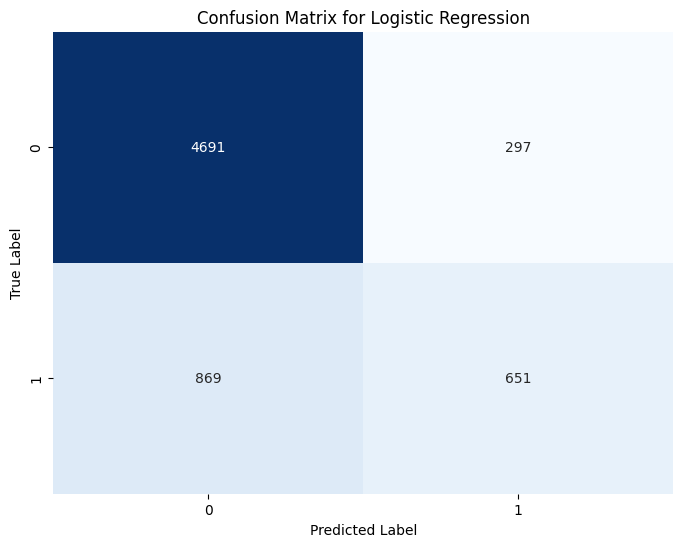

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for Logistic Regression:")
print(cm)

# Accuracy Score for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score for Logistic Regression: {accuracy:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Classification Report for kNN:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4988
           1       0.65      0.57      0.61      1520

    accuracy                           0.83      6508
   macro avg       0.76      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508


Confusion Matrix for kNN:
[[4513  475]
 [ 653  867]]

Accuracy Score for kNN: 0.83


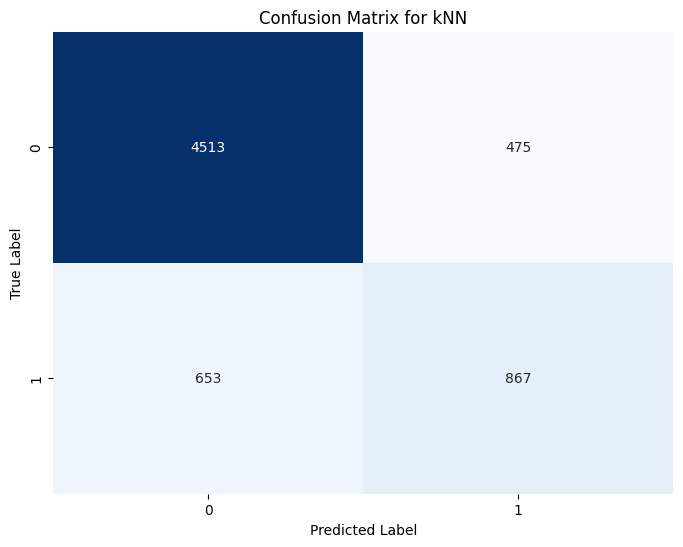

In [ ]:
# Classification Report for kNN
print("Classification Report for kNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for kNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for kNN:")
print(cm_knn)

# Accuracy Score for kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy Score for kNN: {accuracy_knn:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for kNN')
plt.show()

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4988
           1       0.69      0.54      0.61      1520

    accuracy                           0.84      6508
   macro avg       0.78      0.73      0.75      6508
weighted avg       0.83      0.84      0.83      6508


Confusion Matrix for SVM:
[[4627  361]
 [ 703  817]]

Accuracy Score for SVM: 0.84


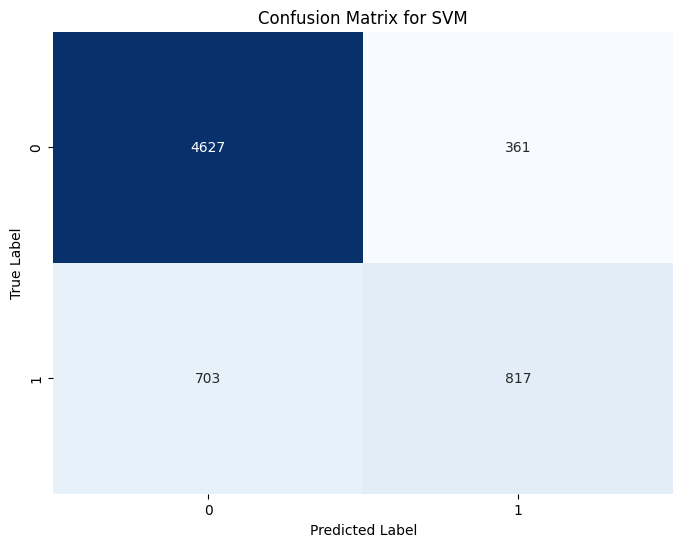

In [ ]:
# Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:")
print(cm_svm)

# Accuracy Score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy Score for SVM: {accuracy_svm:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4988
           1       0.67      0.37      0.48      1520

    accuracy                           0.81      6508
   macro avg       0.75      0.66      0.68      6508
weighted avg       0.79      0.81      0.79      6508


Confusion Matrix for Naive Bayes:
[[4713  275]
 [ 953  567]]

Accuracy Score for Naive Bayes: 0.81


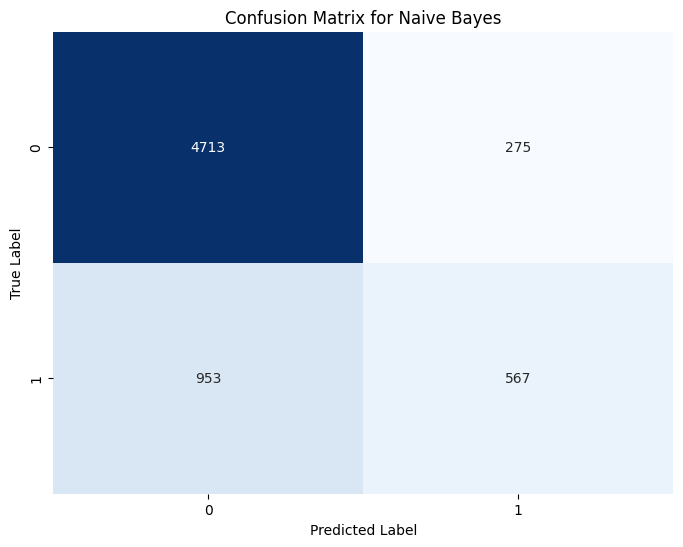

In [ ]:
# Classification Report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix for Naive Bayes:")
print(cm_nb)

# Accuracy Score for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nAccuracy Score for Naive Bayes: {accuracy_nb:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4988
           1       0.59      0.61      0.60      1520

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508


Confusion Matrix for Decision Tree:
[[4341  647]
 [ 590  930]]

Accuracy Score for Decision Tree: 0.81


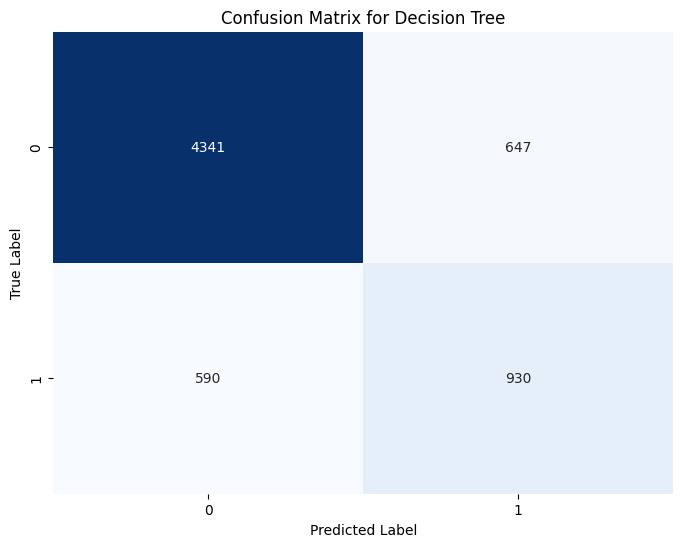

In [ ]:
# Classification Report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree:")
print(cm_dt)

# Accuracy Score for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy Score for Decision Tree: {accuracy_dt:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4988
           1       0.71      0.64      0.67      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508


Confusion Matrix for Random Forest:
[[4585  403]
 [ 548  972]]

Accuracy Score for Random Forest: 0.85


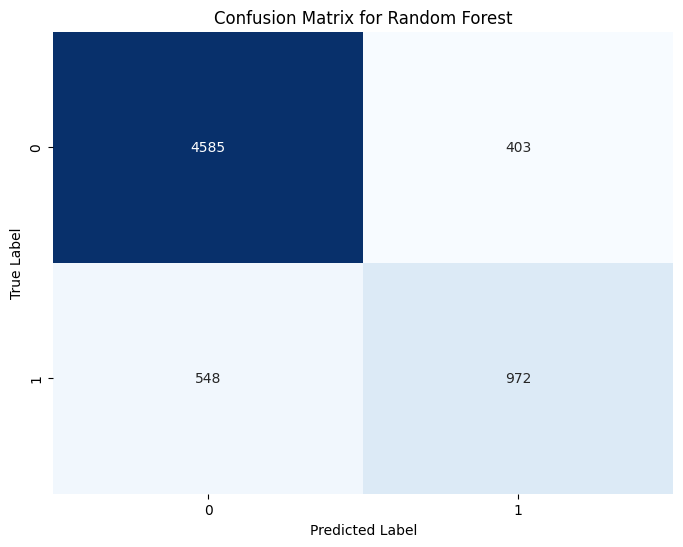

In [ ]:
# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:")
print(cm_rf)

# Accuracy Score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy Score for Random Forest: {accuracy_rf:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4988
           1       0.70      0.65      0.67      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508


Confusion Matrix for MLP Classifier:
[[4562  426]
 [ 538  982]]

Accuracy Score for MLP Classifier: 0.85


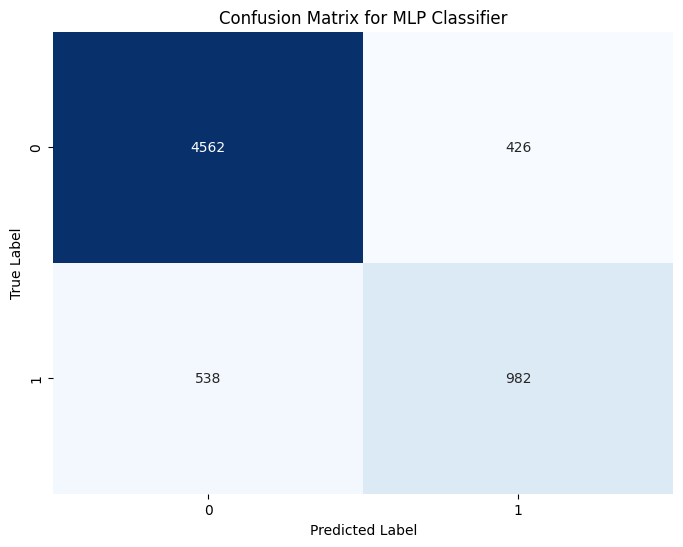

In [ ]:
# Classification Report for MLP Classifier
print("Classification Report for MLP Classifier:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix for MLP Classifier
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("\nConfusion Matrix for MLP Classifier:")
print(cm_mlp)

# Accuracy Score for MLP Classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\nAccuracy Score for MLP Classifier: {accuracy_mlp:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4988
           1       0.77      0.60      0.67      1520

    accuracy                           0.86      6508
   macro avg       0.83      0.77      0.79      6508
weighted avg       0.86      0.86      0.86      6508


Confusion Matrix for Gradient Boosting Classifier:
[[4713  275]
 [ 610  910]]

Accuracy Score for Gradient Boosting Classifier: 0.86


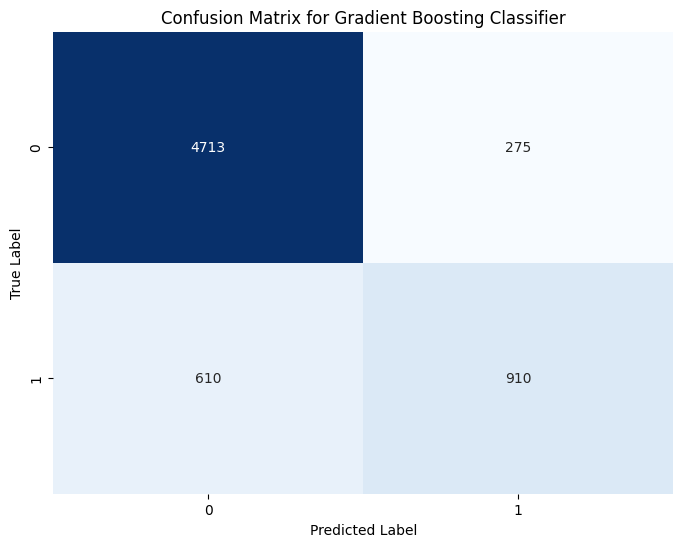

In [ ]:
# Classification Report for Gradient Boosting Classifier
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gbrt))

# Confusion Matrix for Gradient Boosting Classifier
cm_gbrt = confusion_matrix(y_test, y_pred_gbrt)
print("\nConfusion Matrix for Gradient Boosting Classifier:")
print(cm_gbrt)

# Accuracy Score for Gradient Boosting Classifier
accuracy_gbrt = accuracy_score(y_test, y_pred_gbrt)
print(f"\nAccuracy Score for Gradient Boosting Classifier: {accuracy_gbrt:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbrt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4988
           1       0.75      0.66      0.70      1520

    accuracy                           0.87      6508
   macro avg       0.82      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508


Confusion Matrix for XGBoost Classifier:
[[4648  340]
 [ 523  997]]

Accuracy Score for XGBoost Classifier: 0.87


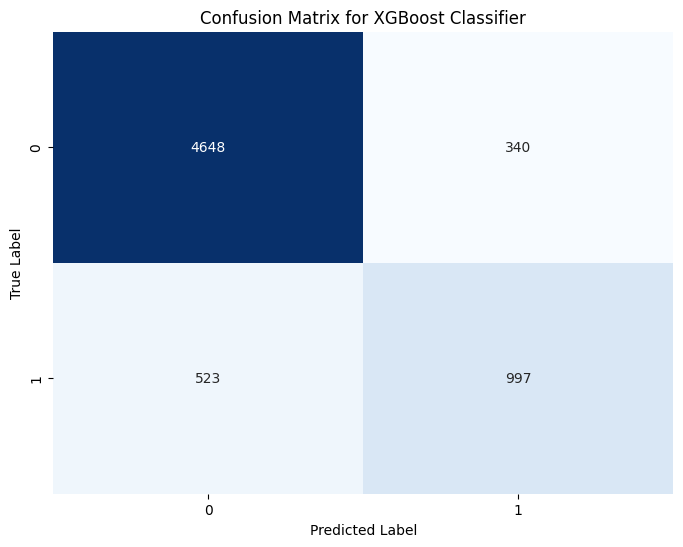

In [ ]:
# Classification Report for XGBoost Classifier
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost Classifier
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix for XGBoost Classifier:")
print(cm_xgb)

# Accuracy Score for XGBoost Classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy Score for XGBoost Classifier: {accuracy_xgb:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create dictionaries to store performance metrics
model_accuracy = {}
model_precision = {}
model_recall = {}
model_f1 = {}

# Function to extract metrics from classification report
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    # Use weighted average for precision, recall, and f1-score
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1

# Get metrics for each model
accuracy, precision, recall, f1 = extract_metrics(y_test, y_pred)
model_accuracy['Logistic Regression'] = accuracy
model_precision['Logistic Regression'] = precision
model_recall['Logistic Regression'] = recall
model_f1['Logistic Regression'] = f1

accuracy_knn, precision_knn, recall_knn, f1_knn = extract_metrics(y_test, y_pred_knn)
model_accuracy['kNN'] = accuracy_knn
model_precision['kNN'] = precision_knn
model_recall['kNN'] = recall_knn
model_f1['kNN'] = f1_knn

accuracy_svm, precision_svm, recall_svm, f1_svm = extract_metrics(y_test, y_pred_svm)
model_accuracy['SVM'] = accuracy_svm
model_precision['SVM'] = precision_svm
model_recall['SVM'] = recall_svm
model_f1['SVM'] = f1_svm

accuracy_nb, precision_nb, recall_nb, f1_nb = extract_metrics(y_test, y_pred_nb)
model_accuracy['Naive Bayes'] = accuracy_nb
model_precision['Naive Bayes'] = precision_nb
model_recall['Naive Bayes'] = recall_nb
model_f1['Naive Bayes'] = f1_nb

accuracy_dt, precision_dt, recall_dt, f1_dt = extract_metrics(y_test, y_pred_dt)
model_accuracy['Decision Tree'] = accuracy_dt
model_precision['Decision Tree'] = precision_dt
model_recall['Decision Tree'] = recall_dt
model_f1['Decision Tree'] = f1_dt

accuracy_rf, precision_rf, recall_rf, f1_rf = extract_metrics(y_test, y_pred_rf)
model_accuracy['Random Forest'] = accuracy_rf
model_precision['Random Forest'] = precision_rf
model_recall['Random Forest'] = recall_rf
model_f1['Random Forest'] = f1_rf

accuracy_mlp, precision_mlp, recall_mlp, f1_mlp = extract_metrics(y_test, y_pred_mlp)
model_accuracy['MLP Classifier'] = accuracy_mlp
model_precision['MLP Classifier'] = precision_mlp
model_recall['MLP Classifier'] = recall_mlp
model_f1['MLP Classifier'] = f1_mlp

accuracy_gbrt, precision_gbrt, recall_gbrt, f1_gbrt = extract_metrics(y_test, y_pred_gbrt)
model_accuracy['Gradient Boosting Classifier'] = accuracy_gbrt
model_precision['Gradient Boosting Classifier'] = precision_gbrt
model_recall['Gradient Boosting Classifier'] = recall_gbrt
model_f1['Gradient Boosting Classifier'] = f1_gbrt

accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = extract_metrics(y_test, y_pred_xgb)
model_accuracy['XGBoost Classifier'] = accuracy_xgb
model_precision['XGBoost Classifier'] = precision_xgb
model_recall['XGBoost Classifier'] = recall_xgb
model_f1['XGBoost Classifier'] = f1_xgb


# Create a pandas DataFrame from the dictionaries
performance_df = pd.DataFrame({
    'Accuracy': model_accuracy,
    'Precision (Weighted Avg)': model_precision,
    'Recall (Weighted Avg)': model_recall,
    'F1-Score (Weighted Avg)': model_f1
})


# Sort the DataFrame by accuracy
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Display the summary table
print("Model Performance Summary:")
display(performance_df)

Model Performance Summary:


,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
XGBoost Classifier,0.867394,0.863087,0.867394,0.864341
Gradient Boosting Classifier,0.864014,0.857967,0.864014,0.857802
Random Forest,0.853872,0.849721,0.853872,0.851259
MLP Classifier,0.851875,0.848483,0.851875,0.849864
SVM,0.836509,0.827336,0.836509,0.828856
kNN,0.826675,0.820451,0.826675,0.822804
Logistic Regression,0.820836,0.807037,0.820836,0.804932
Naive Bayes,0.811309,0.794806,0.811309,0.790232
Decision Tree,0.809926,0.812472,0.809926,0.811129


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn hyperparameter tuning
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define the range of n_neighbors to test
n_neighbors_values = [5, 7, 9, 11]

# Dictionary to store performance metrics for each n_neighbors value
knn_performance = {}

# Function to extract metrics from classification report (using weighted average)
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1

# Iterate through different n_neighbors values
for n in n_neighbors_values:
    print(f"Training and evaluating kNN with n_neighbors = {n}")
    # Initialize the kNN model
    knn_model = KNeighborsClassifier(n_neighbors=n)

    # Train the model
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_knn_tuned = knn_model.predict(X_test)

    # Evaluate the model and store the metrics
    accuracy, precision, recall, f1 = extract_metrics(y_test, y_pred_knn_tuned)
    knn_performance[n] = {
        'Accuracy': accuracy,
        'Precision (Weighted Avg)': precision,
        'Recall (Weighted Avg)': recall,
        'F1-Score (Weighted Avg)': f1
    }


Training and evaluating kNN with n_neighbors = 5
Training and evaluating kNN with n_neighbors = 7
Training and evaluating kNN with n_neighbors = 9
Training and evaluating kNN with n_neighbors = 11


In [ ]:
# Create a pandas DataFrame from the knn_performance dictionary
knn_performance_df = pd.DataFrame.from_dict(knn_performance, orient='index')

# Rename the index to 'n_neighbors'
knn_performance_df.index.name = 'n_neighbors'

# Sort the DataFrame by Accuracy
knn_performance_df = knn_performance_df.sort_values(by='Accuracy', ascending=False)

# Display the table
print("kNN Model Performance with Different n_neighbors:")
display(knn_performance_df)

kNN Model Performance with Different n_neighbors:


,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
n_neighbors,,,,
11,0.830209,0.823349,0.830209,0.825732
7,0.829902,0.823692,0.829902,0.825986
9,0.829902,0.823187,0.829902,0.825560
5,0.826675,0.820451,0.826675,0.822804


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define the kernel types to test
kernel_values = ['linear', 'rbf', 'poly']

# Dictionary to store performance metrics for each kernel type
svm_performance = {}

# Function to extract metrics from classification report (using weighted average)
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1

# Iterate through different kernel types
for kernel in kernel_values:
    print(f"Training and evaluating SVM with kernel = '{kernel}'")
    # Initialize the SVM model
    svm_model = SVC(kernel=kernel, random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_svm_tuned = svm_model.predict(X_test)

    # Evaluate the model and store the metrics
    accuracy, precision, recall, f1 = extract_metrics(y_test, y_pred_svm_tuned)
    svm_performance[kernel] = {
        'Accuracy': accuracy,
        'Precision (Weighted Avg)': precision,
        'Recall (Weighted Avg)': recall,
        'F1-Score (Weighted Avg)': f1
    }


print("\nFinished SVM hyperparameter tuning.")

Training and evaluating SVM with kernel = 'linear'
Training and evaluating SVM with kernel = 'rbf'
Training and evaluating SVM with kernel = 'poly'

Finished SVM hyperparameter tuning.


In [ ]:
# Create a pandas DataFrame from the svm_performance dictionary
svm_performance_df = pd.DataFrame.from_dict(svm_performance, orient='index')

# Rename the index to 'kernel'
svm_performance_df.index.name = 'kernel'

# Sort the DataFrame by Accuracy
svm_performance_df = svm_performance_df.sort_values(by='Accuracy', ascending=False)

# Display the table
print("SVM Model Performance with Different Kernels:")
display(svm_performance_df)

SVM Model Performance with Different Kernels:


,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
kernel,,,,
rbf,0.836509,0.827336,0.836509,0.828856
poly,0.825907,0.813816,0.825907,0.808056
linear,0.812692,0.807517,0.812692,0.776218


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define the range of n_estimators to test
n_estimators_values = [50, 100, 150]

# Dictionary to store performance metrics for each n_estimators value
rf_performance = {}

# Function to extract metrics from classification report (using weighted average)
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1

# Iterate through different n_estimators values
for n in n_estimators_values:
    print(f"Training and evaluating Random Forest with n_estimators = {n}")
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_rf_tuned = rf_model.predict(X_test)

    # Evaluate the model and store the metrics
    accuracy, precision, recall, f1 = extract_metrics(y_test, y_pred_rf_tuned)
    rf_performance[n] = {
        'Accuracy': accuracy,
        'Precision (Weighted Avg)': precision,
        'Recall (Weighted Avg)': recall,
        'F1-Score (Weighted Avg)': f1
    }


print("\nFinished Random Forest hyperparameter tuning.")

Training and evaluating Random Forest with n_estimators = 50
Training and evaluating Random Forest with n_estimators = 100
Training and evaluating Random Forest with n_estimators = 150

Finished Random Forest hyperparameter tuning.


In [ ]:
# Create a pandas DataFrame from the rf_performance dictionary
rf_performance_df = pd.DataFrame.from_dict(rf_performance, orient='index')

# Rename the index to 'n_estimators'
rf_performance_df.index.name = 'n_estimators'

# Sort the DataFrame by Accuracy
rf_performance_df = rf_performance_df.sort_values(by='Accuracy', ascending=False)

# Display the table
print("Random Forest Model Performance with Different n_estimators:")
display(rf_performance_df)

Random Forest Model Performance with Different n_estimators:


,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
n_estimators,,,,
150,0.856945,0.852734,0.856945,0.854235
100,0.853872,0.849721,0.853872,0.851259
50,0.853719,0.848908,0.853719,0.850532
